# Advanced Regression Assignment

## Importing Libraries

In [1]:
# basic processing libraries
import pandas as pd, numpy as np

In [2]:
# plotting libraries
import matplotlib.pyplot as plt, seaborn as sns

In [3]:
# modeling libraries
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [4]:
# Evaluation libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
# configuring options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 3)

import warnings
warnings.filterwarnings('ignore')

## Exploratory Analysis

### Understanding data

In [6]:
# reading data and understanding it
house = pd.read_csv('train.csv')
house.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
house.shape

(1460, 81)

Observation
- there are 1460 rows
- there are 81 columns

In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Observation:
- there are many columns which have lot of null values
- there are good amount of 43 categorical variables, and 38 quantitative variables, making a total of 81 predictors

In [9]:
null_cols = (house.isnull().sum() / house.shape[0] )*100
null_cols = null_cols[null_cols>0]
null_cols

LotFrontage     17.740
Alley           93.767
MasVnrType      59.726
MasVnrArea       0.548
BsmtQual         2.534
BsmtCond         2.534
BsmtExposure     2.603
BsmtFinType1     2.534
BsmtFinType2     2.603
Electrical       0.068
FireplaceQu     47.260
GarageType       5.548
GarageYrBlt      5.548
GarageFinish     5.548
GarageQual       5.548
GarageCond       5.548
PoolQC          99.521
Fence           80.753
MiscFeature     96.301
dtype: float64

Observation:
- Total of 19 predictors have missing values
- 6 predictors out of 81 are having more than 45% null values
- Only 1 predictor has 17% null values
- 12 predictors out of 81 have null values in range 0% to 6%

In [10]:
house.describe(include = np.number) # understanding statistical numbers for numeric columns of data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.50,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.61,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.00,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.75,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.50,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.25,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.00,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


Observations
- Id column has all unique entries
- All the predictors vary in range, scaling is needed

In [11]:
house.describe(include = 'object') # understanding catergorical columns of the data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


Observation
- no categorical column is having only one unique values
- these columns need to be converted to dummy variables

### Data Cleanup and Missing Value Treatment

In [12]:
house.drop(['Id'], axis=1, inplace=True) # dropping Id as it was had all unique value which will not help in prediction
house.shape

(1460, 80)

In [13]:
house.drop(null_cols[null_cols>40].keys(), axis=1, inplace=True) # dropping all columns having >40% null values
house.shape

(1460, 74)

In [14]:
# checking remaining null valued columns
null_cols = (house.isnull().sum() / house.shape[0] )*100
null_cols = null_cols[null_cols>0]
null_cols

LotFrontage     17.740
MasVnrArea       0.548
BsmtQual         2.534
BsmtCond         2.534
BsmtExposure     2.603
BsmtFinType1     2.534
BsmtFinType2     2.603
Electrical       0.068
GarageType       5.548
GarageYrBlt      5.548
GarageFinish     5.548
GarageQual       5.548
GarageCond       5.548
dtype: float64

In [15]:
# imputing LotFrontage
house[['LotFrontage']].value_counts().head()

LotFrontage
60.0           143
70.0            70
80.0            69
50.0            57
75.0            53
Name: count, dtype: int64

In [16]:
house['LotFrontage'].fillna(int(house[['LotFrontage']].mean()), inplace=True)
house[['LotFrontage']].value_counts().head()

LotFrontage
70.0           329
60.0           143
80.0            69
50.0            57
75.0            53
Name: count, dtype: int64

In [17]:
# Rechecking null valued columns
null_cols = (house.isnull().sum() / house.shape[0] )*100
null_cols = null_cols[null_cols>0]
null_cols

MasVnrArea      0.548
BsmtQual        2.534
BsmtCond        2.534
BsmtExposure    2.603
BsmtFinType1    2.534
BsmtFinType2    2.603
Electrical      0.068
GarageType      5.548
GarageYrBlt     5.548
GarageFinish    5.548
GarageQual      5.548
GarageCond      5.548
dtype: float64

In [18]:
# checking for how to impute the remaining null valued columns
for i in null_cols.keys():
    print(house[i].value_counts().head(3))

MasVnrArea
0.0      861
180.0      8
72.0       8
Name: count, dtype: int64
BsmtQual
TA    649
Gd    618
Ex    121
Name: count, dtype: int64
BsmtCond
TA    1311
Gd      65
Fa      45
Name: count, dtype: int64
BsmtExposure
No    953
Av    221
Gd    134
Name: count, dtype: int64
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
Name: count, dtype: int64
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
Name: count, dtype: int64
Electrical
SBrkr    1334
FuseA      94
FuseF      27
Name: count, dtype: int64
GarageType
Attchd     870
Detchd     387
BuiltIn     88
Name: count, dtype: int64
GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
Name: count, dtype: int64
GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64
GarageQual
TA    1311
Fa      48
Gd      14
Name: count, dtype: int64
GarageCond
TA    1326
Fa      35
Gd       9
Name: count, dtype: int64


In [19]:
# imputing the rest with most frequent values
house['MasVnrArea'].fillna(0, inplace=True)
house['GarageYrBlt'].fillna(2005, inplace=True)
house['BsmtQual'].fillna('TA', inplace=True)
house['BsmtCond'].fillna('TA', inplace=True)
house['BsmtExposure'].fillna('No', inplace=True)
house['BsmtFinType1'].fillna('Unf', inplace=True)
house['BsmtFinType2'].fillna('Unf', inplace=True)
house['Electrical'].fillna('SBrkr', inplace=True)
house['GarageType'].fillna('Attchd', inplace=True)
house['GarageFinish'].fillna('Unf', inplace=True)
house['GarageQual'].fillna('TA', inplace=True)
house['GarageCond'].fillna('TA', inplace=True)

In [20]:
house.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

Observation
- all null values are taken care of

### Data Visualization

In [21]:
num_data = house.select_dtypes(include=np.number)
num_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [22]:
num_data.drop(['MSSubClass', 'YrSold', 'MoSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

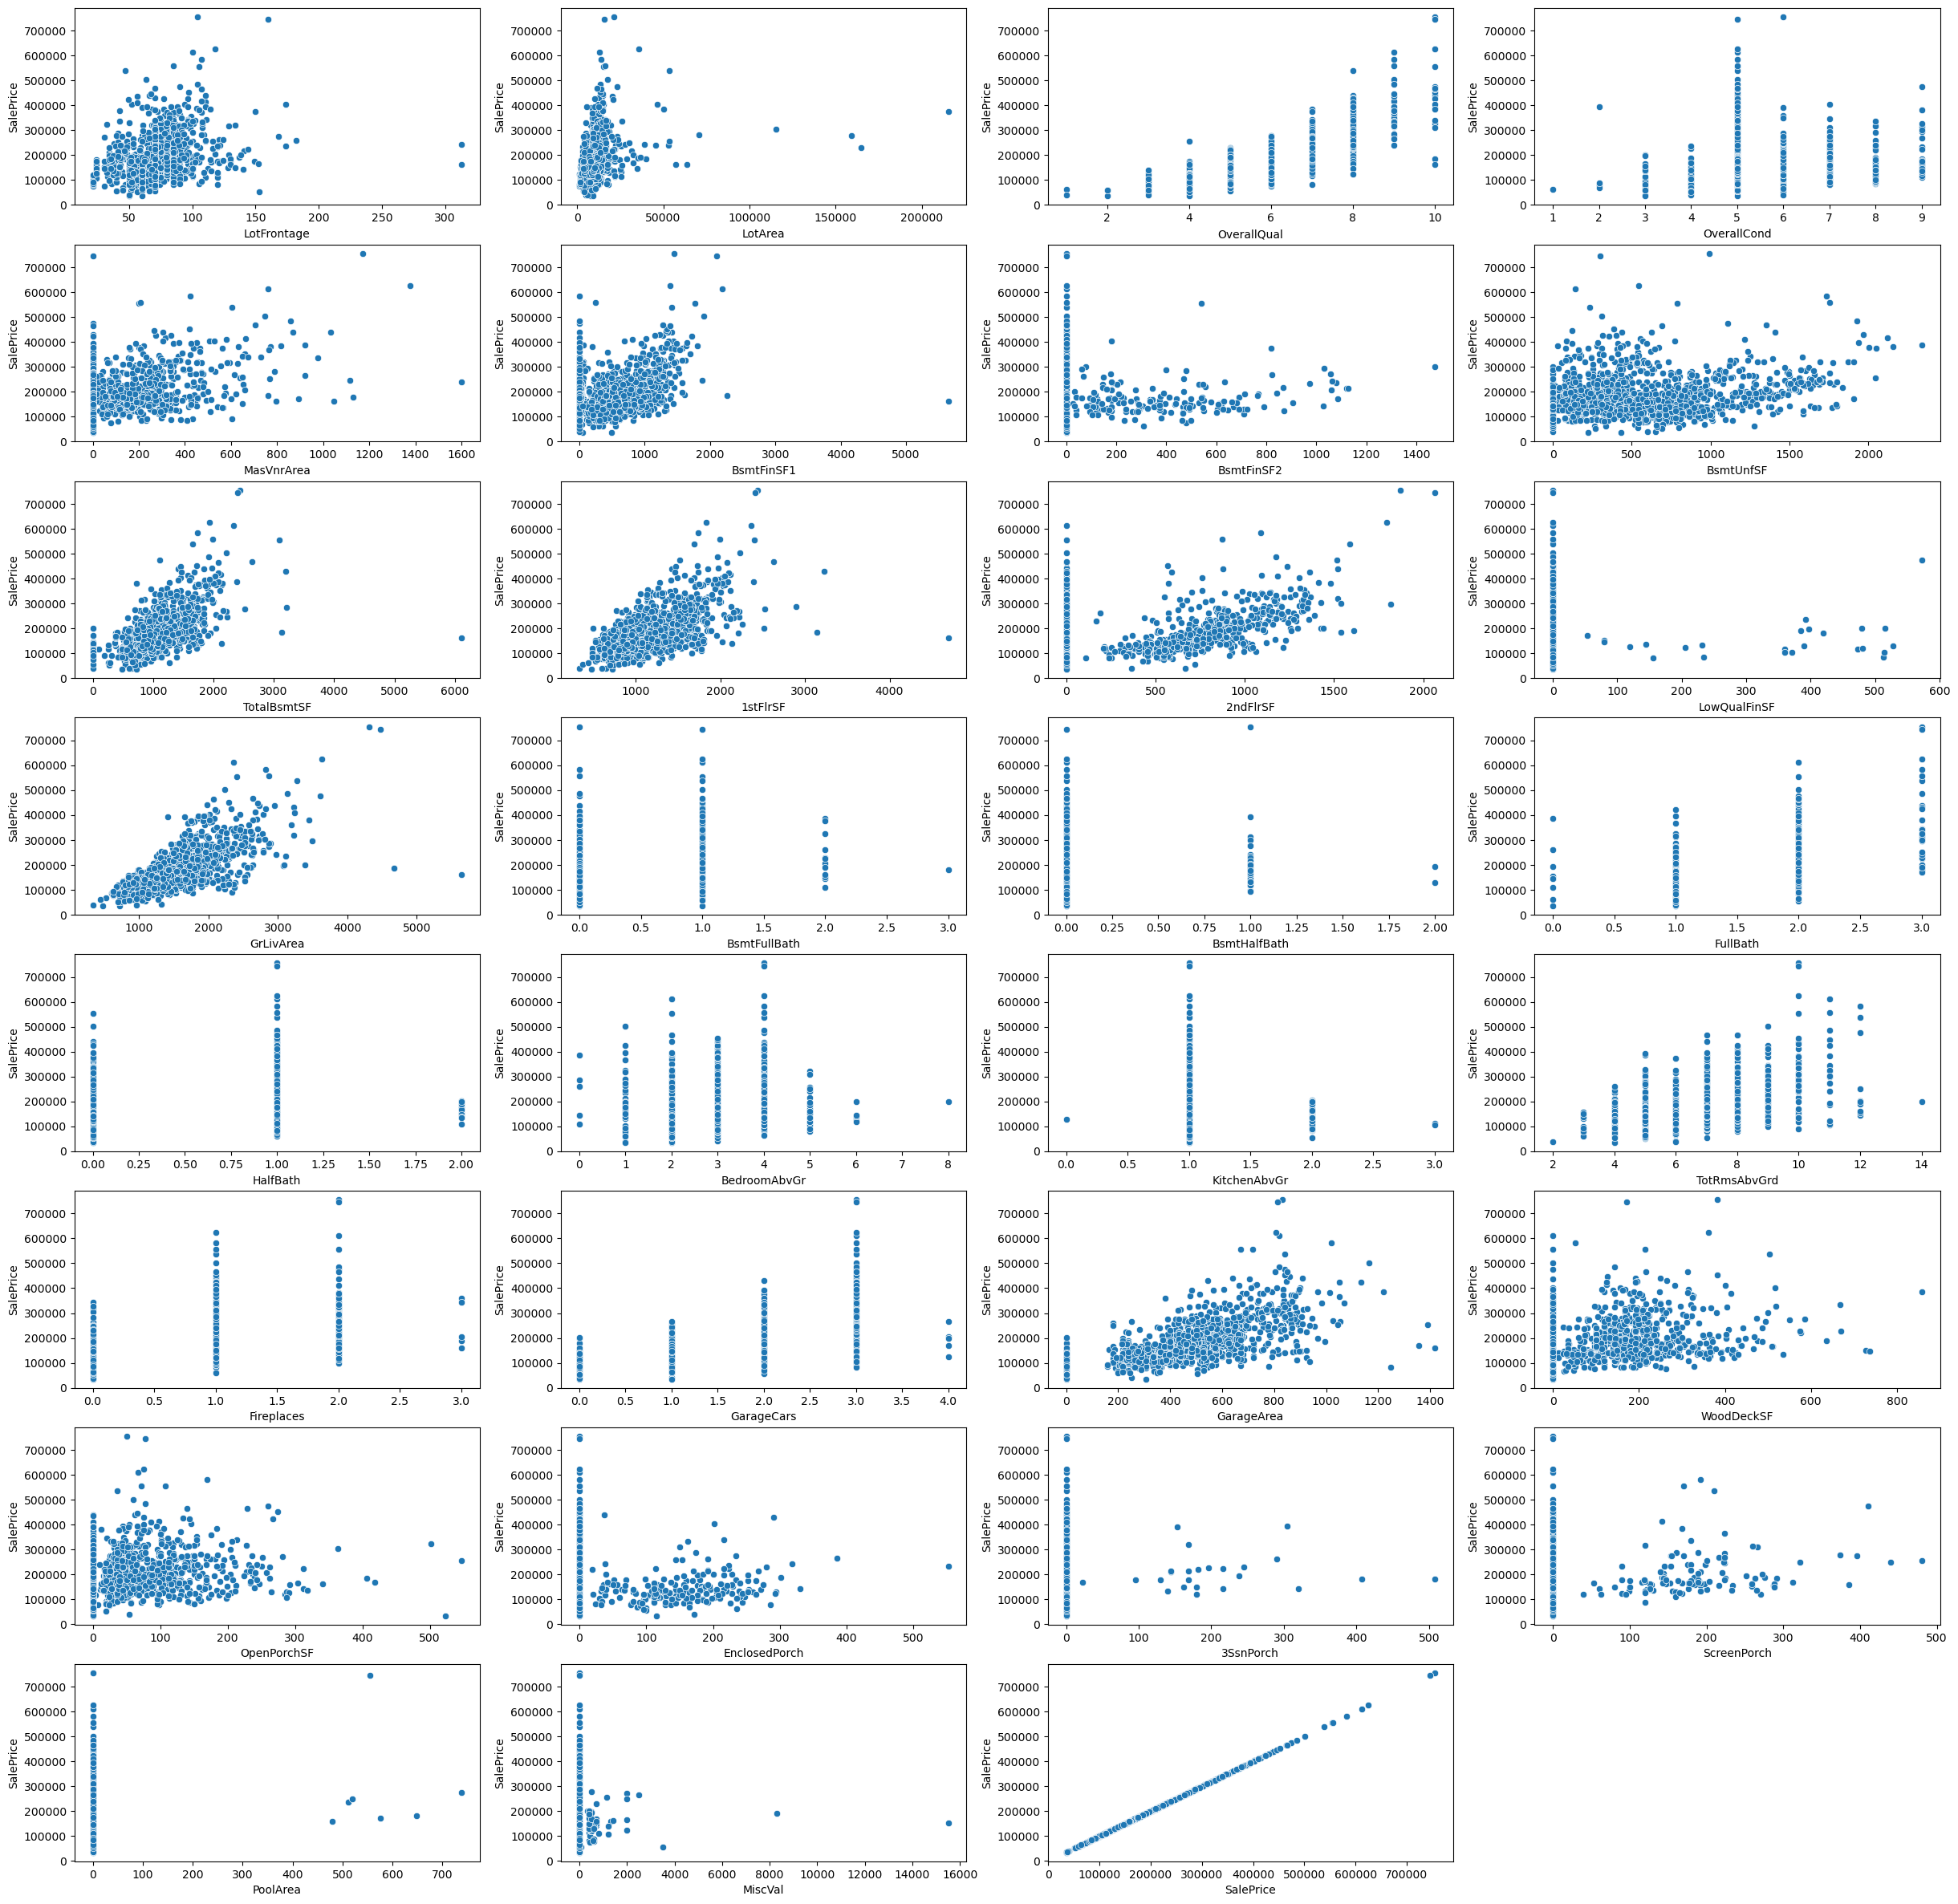

In [23]:
# plotting catergorical variables
plt.figure(figsize=(30, 30))

for i in list(range(1, num_data.shape[1]+1)):
    plt.subplot(8, 4, i)
    sns.scatterplot(x = num_data.columns[i-1], y = 'SalePrice', data = house)

plt.show()

Observation
- there are no non linear features, this means it can be handled with Linear Regression
- Price seems to  dependent on Area of the house (basement area, 1st floor area, 2nd floor area, gound living area, garage area, etc.)
- there is also some visible patterns for Total rooms, etc.

In [24]:
cat_data = house.select_dtypes(include='object')
cat_data = pd.concat([cat_data, house[['MSSubClass', 'YrSold', 'MoSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']]], axis=1)
cat_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition', 'MSSubClass', 'YrSold', 'MoSold',
       'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'],
      dtype='object')

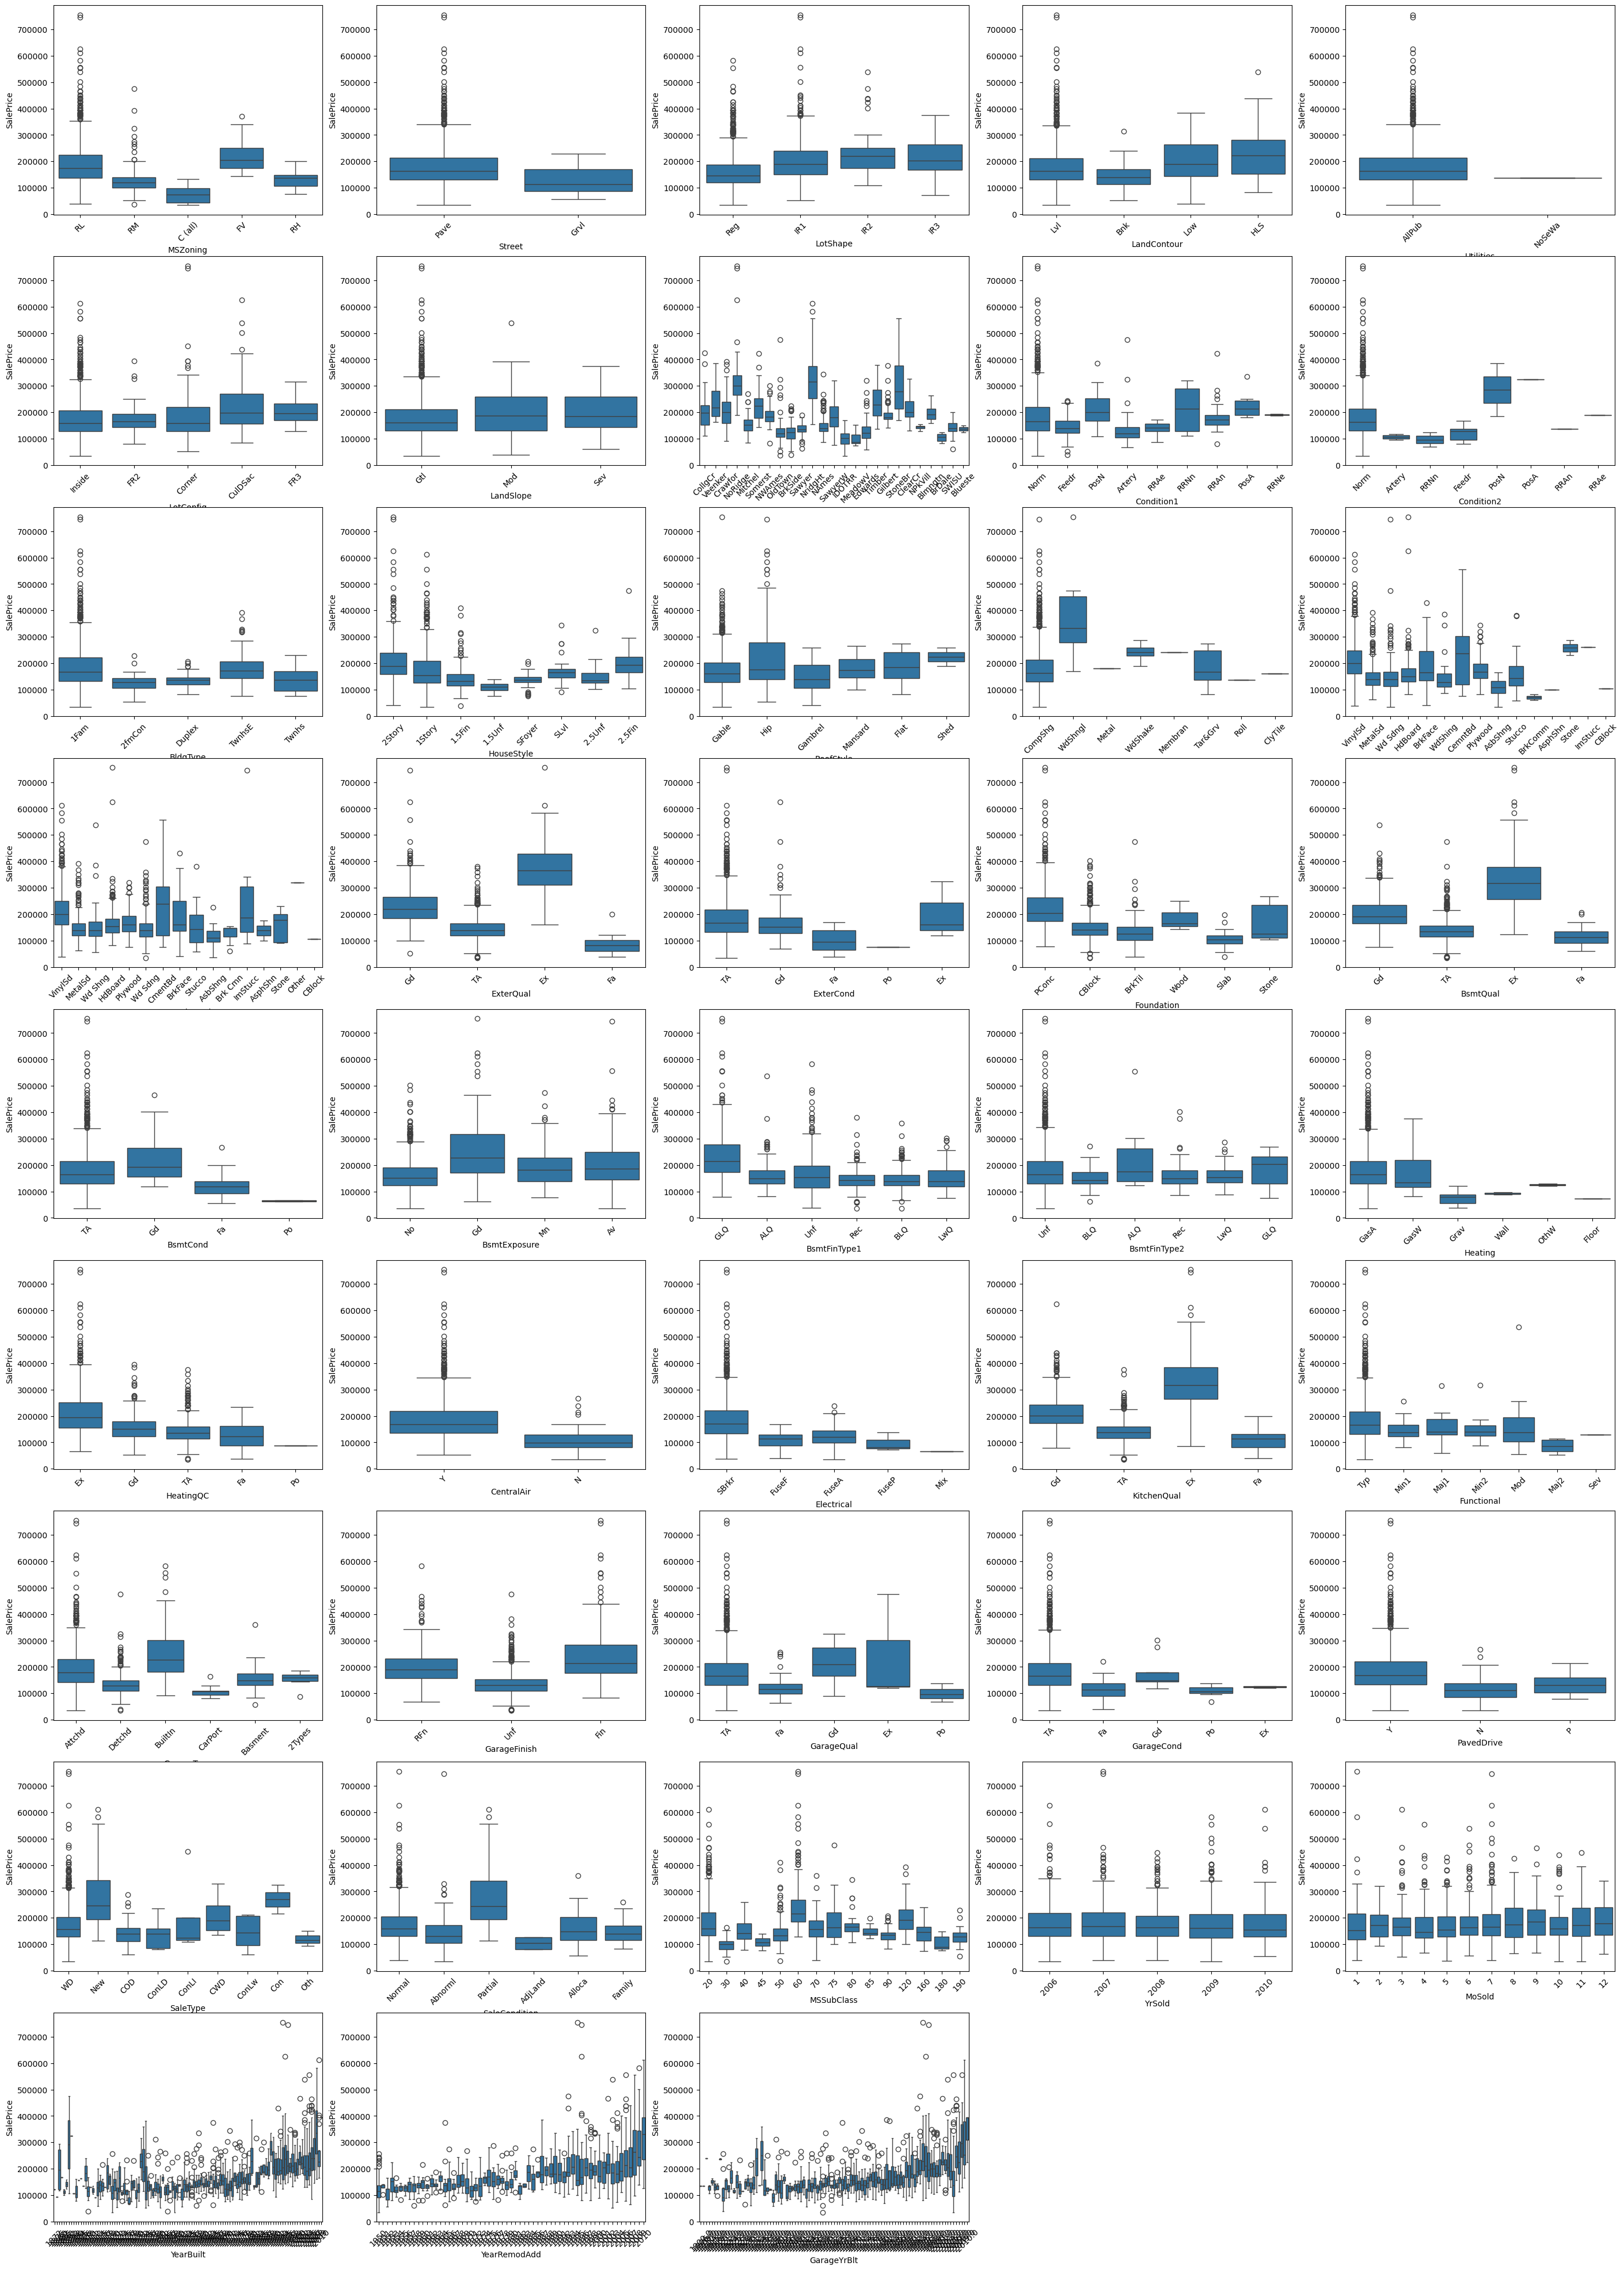

In [25]:
# plotting catergorical variables
plt.figure(figsize=(35, 50))

for i in list(range(1, cat_data.shape[1]+1)):
    plt.subplot(9, 5, i)
    sns.boxplot(x = cat_data.columns[i-1], y = 'SalePrice', data = house)
    plt.xticks(rotation=45)

plt.show()

Observation
- all categorical variables seem to have some kind of impact
- Good Quality of the room, Recently built or remodeled houses have higher prices
- Amenities and features around the house also has significance

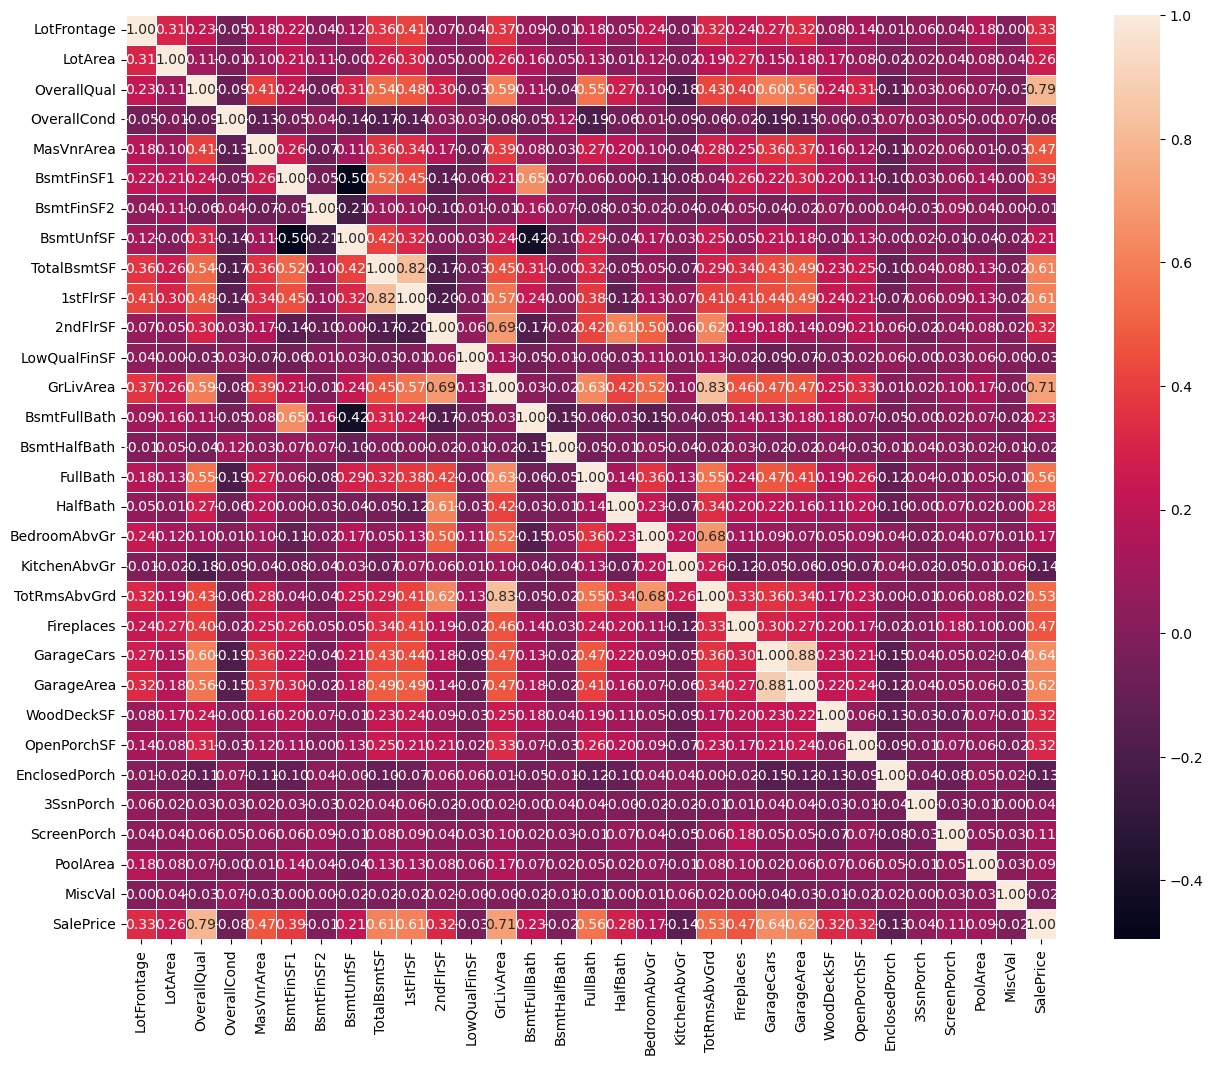

In [26]:
# plotting heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(num_data.corr(), annot=True, fmt='.2f', linewidth=0.5)
plt.show()

Observation
- Garage Car capacity and garage area are highly related, seems there is multicollinearity
- Total Basement area and 1st Floor area are also highly realted
- Area features, Quality features of the house seems to contribute to sales price

## Data Pre-Processing

In [27]:
# encoding categorical variables to numeric
l = LabelEncoder()
for col in cat_data.columns:
    cat_data[col] = l.fit_transform(cat_data[col])

cat_data.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,YrSold,MoSold,YearBuilt,YearRemodAdd,GarageYrBlt
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,5,2,1,104,53,89
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4,0,1,4,77,26,62
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,5,2,8,102,52,87
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0,6,0,1,19,20,84
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,5,2,11,101,50,86


In [28]:
# addring the encoded data to dataframe
house.drop(cat_data.columns, axis=1, inplace=True)
house = pd.concat([house, cat_data], axis=1)

house.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,YrSold,MoSold,YearBuilt,YearRemodAdd,GarageYrBlt
0,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,5,2,1,104,53,89
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4,0,1,4,77,26,62
2,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,5,2,8,102,52,87
3,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0,6,0,1,19,20,84
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,5,2,11,101,50,86


In [29]:
# Splitting data into X and y
y=house['SalePrice']
X=house.drop(['SalePrice'], axis=1)

# removing target column for numeric data, for future purpose
num_data.drop(['SalePrice'], axis=1, inplace=True)

In [30]:
# train test split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1021, 73), (1021,), (438, 73), (438,))

In [31]:
# scaling the train dataset
scaler = MinMaxScaler()

X_train[num_data.columns] = scaler.fit_transform(X_train[num_data.columns])
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,YrSold,MoSold,YearBuilt,YearRemodAdd,GarageYrBlt
210,0.158,0.019,0.444,0.625,0.00,0.083,0.0,0.170,0.141,0.114,0.000,0.0,0.082,0.333,0.0,0.333,0.0,0.250,0.0,0.182,0.000,0.00,0.000,0.000,0.000,0.174,0.0,0.0,0.0,0.0,3,1,3,3,0,4,0,7,2,2,0,2,1,1,11,12,3,4,1,3,3,3,4,5,1,4,0,0,3,6,1,2,4,4,2,8,4,1,2,3,29,0,91
318,0.236,0.039,0.667,0.500,0.16,0.175,0.0,0.154,0.220,0.231,0.617,0.0,0.424,0.333,0.0,0.667,0.5,0.500,0.0,0.545,0.333,0.75,0.463,0.397,0.115,0.261,0.0,0.0,0.0,0.0,3,1,3,2,0,4,1,15,2,2,0,5,1,1,6,6,2,4,2,2,3,1,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,5,3,3,94,43,79
239,0.106,0.034,0.556,0.375,0.00,0.017,0.0,0.274,0.120,0.099,0.334,0.0,0.202,0.000,0.0,0.333,0.5,0.375,0.0,0.364,0.333,0.25,0.155,0.000,0.268,0.000,0.0,0.0,0.0,0.0,3,1,3,3,0,4,0,7,2,2,0,0,1,1,12,13,3,4,1,3,0,3,3,5,1,4,1,0,3,6,5,2,4,4,2,8,4,4,4,3,46,0,35
986,0.130,0.018,0.556,0.875,0.00,0.000,0.0,0.208,0.079,0.146,0.307,0.0,0.230,0.000,0.0,0.333,0.0,0.250,0.0,0.182,0.000,0.25,0.180,0.460,0.000,0.000,0.0,0.0,0.0,0.0,4,1,3,3,0,0,0,17,1,2,0,0,3,1,12,13,3,2,1,3,0,3,5,5,1,2,1,4,2,6,1,2,1,4,2,8,4,4,0,5,14,53,36
1416,0.134,0.046,0.333,0.625,0.00,0.000,0.0,0.333,0.127,0.202,0.506,0.0,0.356,0.000,0.0,0.667,0.0,0.500,0.5,0.727,0.000,0.50,0.395,0.000,0.000,0.207,0.0,0.0,0.0,0.0,4,1,3,3,0,4,0,17,2,2,1,5,1,1,12,0,3,4,2,3,3,3,5,5,1,2,1,4,3,6,5,2,4,4,0,8,4,14,4,3,4,0,57


In [32]:
# scaling the test dataset
X_test[num_data.columns] = scaler.transform(X_test[num_data.columns])
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,YrSold,MoSold,YearBuilt,YearRemodAdd,GarageYrBlt
1436,0.134,0.035,0.333,0.625,0.000,0.109,0.0,0.106,0.141,0.114,0.000,0.0,0.082,0.000,0.0,0.333,0.0,0.375,0.0,0.182,0.000,0.50,0.372,0.000,0.000,0.0,0.0,0.0,0.000,0.0,3,1,3,3,0,2,0,12,2,2,0,2,1,1,6,6,3,4,2,3,3,3,0,5,1,4,1,4,3,6,5,2,4,4,2,8,4,0,1,4,72,21,60
57,0.233,0.048,0.667,0.500,0.000,0.000,0.0,0.368,0.141,0.113,0.416,0.0,0.246,0.000,0.0,0.667,0.5,0.375,0.0,0.364,0.000,0.50,0.398,0.000,0.134,0.0,0.0,0.0,0.000,0.0,3,1,0,3,0,0,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,3,5,5,1,0,1,4,2,6,1,1,4,4,2,8,4,5,0,7,105,54,90
780,0.144,0.030,0.667,0.500,0.024,0.000,0.0,0.530,0.202,0.204,0.000,0.0,0.157,0.000,0.0,0.667,0.0,0.375,0.0,0.273,0.333,0.50,0.283,0.257,0.040,0.0,0.0,0.0,0.000,0.0,3,1,3,3,0,4,0,8,2,2,0,2,1,1,6,6,3,4,2,2,1,3,5,5,1,2,1,4,3,6,1,0,4,4,2,8,4,0,1,5,96,46,81
382,0.199,0.036,0.667,0.500,0.000,0.000,0.0,0.402,0.154,0.131,0.415,0.0,0.261,0.000,0.0,0.667,0.5,0.375,0.0,0.455,0.000,0.50,0.451,0.168,0.101,0.0,0.0,0.0,0.000,0.0,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,0,5,5,1,0,1,4,2,6,1,1,4,4,2,8,4,5,1,3,107,56,92
1170,0.188,0.039,0.556,0.625,0.000,0.092,0.0,0.246,0.179,0.173,0.000,0.0,0.131,0.333,0.0,0.333,0.0,0.375,0.0,0.273,0.333,0.25,0.252,0.237,0.000,0.0,0.0,0.0,0.889,0.0,3,1,3,3,0,4,0,11,2,2,0,7,1,1,9,10,3,4,1,3,3,0,0,5,1,4,1,4,3,6,1,0,4,4,2,8,4,8,2,6,78,27,63


## Modeling

In [33]:
# initialization for K-fold Cross Validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

### Linear Regression

In [34]:
linreg = LinearRegression() # initializing model

In [35]:
linreg.fit(X_train, y_train) # fitting the train data

LinearRegression()

In [36]:
# Predicting on train set
y_train_lin = linreg.predict(X_train)

# predicting on test set
y_test_lin = linreg.predict(X_test)

In [37]:
# R2 squre
Train_r2= round(r2_score(y_train, y_train_lin), 5) 
Test_r2 = round(r2_score(y_test, y_test_lin), 5)

In [38]:
error = pd.DataFrame([Train_r2, Test_r2], columns = ['Scores_Lin'], index= ['Train R2', 'Test R2'])

error

,Scores_Lin
Train R2,0.844
Test R2,0.840


In [39]:
# Getting coefficent
coeff = pd.DataFrame(linreg.coef_, columns=['Lin_Coeff'], index=X_train.columns)
coeff.head()

,Lin_Coeff
LotFrontage,-31472.208
LotArea,62134.681
OverallQual,109286.310
OverallCond,33695.141
MasVnrArea,43915.484


In [40]:
# Top Features
coeff[['Lin_Coeff']].abs().sort_values(by='Lin_Coeff', ascending=False).head(10)

,Lin_Coeff
GrLivArea,117188.435
1stFlrSF,112335.117
OverallQual,109286.310
LotArea,62134.681
2ndFlrSF,61236.654
GarageCars,46051.500
MasVnrArea,43915.484
Utilities,40927.731
BsmtFullBath,33824.788
OverallCond,33695.141


<Figure size 1000x1000 with 0 Axes>

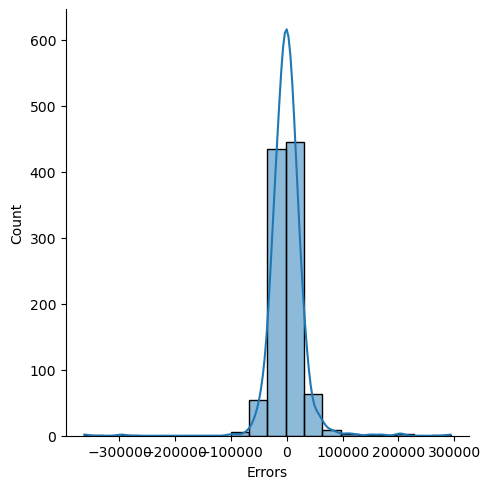

In [41]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = (10, 10))
sns.displot((y_train - y_train_lin), bins = 20, kde=True)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors') 
plt.show()

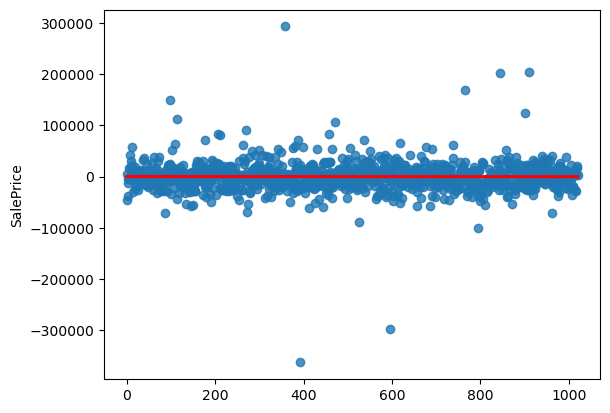

In [42]:
# Plot the scatterplot of the error terms
sns.regplot(x=list(range(0, y_train_lin.shape[0])), y=(y_train - y_train_lin), line_kws=dict(color="r"))
plt.show()

Observation
- Plotting histogram of errors obtained, a normal distribution is obtained this means there is a linear relationship between demand and set of predictor variables
- Scatter plot for errors shows there is homoscedasticity, i.e. error terms have constant variance

### Ridge Regression

In [43]:
ridgereg = Ridge() # initializing model

In [44]:
lambdas_ridge = [{'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}] # setting different values of lambda/alpha

# perform Gird Search to get best value for lambda/alpha
ridge_cv = GridSearchCV(estimator = ridgereg, 
                        param_grid = lambdas_ridge, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

ridge_cv.fit(X_train, y_train) # fit the model

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid=[{'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             return_train_score=True, scoring='r2', verbose=1)

In [45]:
print("Results from Grid Search" )
print("The best estimator across ALL searched params:",ridge_cv.best_estimator_)
print("The best score across ALL searched params:",ridge_cv.best_score_)
print("The best parameters across ALL searched params:",ridge_cv.best_params_)

Results from Grid Search
The best estimator across ALL searched params: Ridge(alpha=10)
The best score across ALL searched params: 0.7846725451617343
The best parameters across ALL searched params: {'alpha': 10}


In [46]:
# initializing Ridge model for best lamda 0.001
ridgereg = Ridge(alpha = 10) 

ridgereg.fit(X_train, y_train)

Ridge(alpha=10)

In [47]:
# Predicting on train set
y_train_ridge = ridgereg.predict(X_train)

# Predicting on test set
y_test_ridge = ridgereg.predict(X_test)

In [48]:
# R2 squre
Train_r2= round(r2_score(y_train, y_train_ridge), 5) 
Test_r2 = round(r2_score(y_test, y_test_ridge), 5)

In [49]:
error['Score_Ridge'] = [Train_r2, Test_r2]

error

,Scores_Lin,Score_Ridge
Train R2,0.844,0.829
Test R2,0.840,0.826


In [50]:
coeff['Ridge_Coeff'] = ridgereg.coef_
coeff.head()

,Lin_Coeff,Ridge_Coeff
LotFrontage,-31472.208,-873.868
LotArea,62134.681,11356.719
OverallQual,109286.310,61982.629
OverallCond,33695.141,15628.526
MasVnrArea,43915.484,32046.169


In [51]:
# Top Features
coeff[['Ridge_Coeff']].abs().sort_values(by='Ridge_Coeff', ascending=False).head(10)

,Ridge_Coeff
OverallQual,61982.629
GrLivArea,46356.790
2ndFlrSF,42933.162
1stFlrSF,35437.123
MasVnrArea,32046.169
TotRmsAbvGrd,31982.729
Fireplaces,28082.155
GarageCars,26737.448
FullBath,26188.258
BsmtFullBath,23563.566


<Figure size 1000x1000 with 0 Axes>

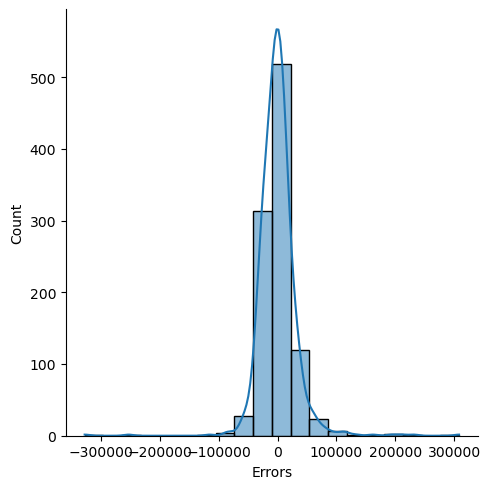

In [52]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = (10, 10))
sns.displot((y_train - y_train_ridge), bins = 20, kde=True)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors') 
plt.show()

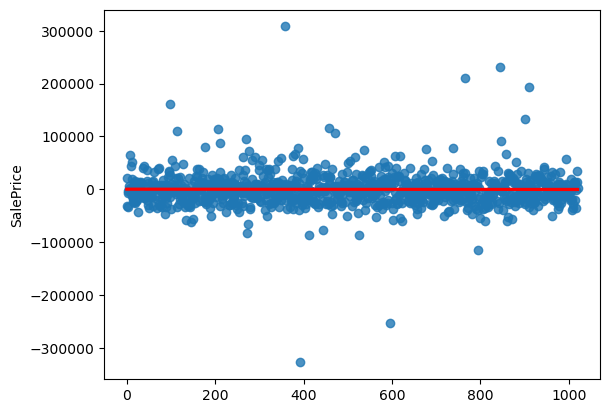

In [53]:
# Plot the scatterplot of the error terms
sns.regplot(x=list(range(0, y_train_ridge.shape[0])), y=(y_train - y_train_ridge), line_kws=dict(color="r"))
plt.show()

Observation
- Plotting histogram of errors obtained, a normal distribution is obtained this means there is a linear relationship between demand and set of predictor variables
- Scatter plot fo errorsd shows there is homoscedasticity, i.e. error terms have constant variance

### Lasso Regression

In [54]:
lassoreg = Lasso()

In [55]:
lambdas_lasso = [{'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}] # setting different values of lambda/alpha

# perform Gird Search to get best value for lambda/alpha
lasso_cv = GridSearchCV(estimator = lassoreg, 
                        param_grid = lambdas_lasso, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

lasso_cv.fit(X_train, y_train) # fit the model

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid=[{'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             return_train_score=True, scoring='r2', verbose=1)

In [56]:
print("Results from Grid Search" )
print("The best estimator across ALL searched params:",lasso_cv.best_estimator_)
print("The best score across ALL searched params:",lasso_cv.best_score_)
print("The best parameters across ALL searched params:",lasso_cv.best_params_)

Results from Grid Search
The best estimator across ALL searched params: Lasso(alpha=100)
The best score across ALL searched params: 0.7754757331602351
The best parameters across ALL searched params: {'alpha': 100}


In [57]:
# initializing Ridge model for best lamda 0.001
lassoreg = Lasso(alpha = 100) 

lassoreg.fit(X_train, y_train)

Lasso(alpha=100)

In [58]:
# Predicting on train set
y_train_lasso = lassoreg.predict(X_train)

# Predicting on train set
y_test_lasso = lassoreg.predict(X_test)

In [59]:
# R2 squre
Train_r2= round(r2_score(y_train, y_train_lasso), 5) 
Test_r2 = round(r2_score(y_test, y_test_lasso), 5)

In [60]:
error['Score_Lasso'] = [Train_r2, Test_r2]

error

,Scores_Lin,Score_Ridge,Score_Lasso
Train R2,0.844,0.829,0.840
Test R2,0.840,0.826,0.834


Observation
- By reguraliazing and removing unrequired variables Lasso is giving a good performance as compared to Ridge

In [61]:
coeff['Lasso_Coeff'] = lassoreg.coef_
coeff

,Lin_Coeff,Ridge_Coeff,Lasso_Coeff
LotFrontage,-31472.208,-873.868,-0.000
LotArea,62134.681,11356.719,0.000
OverallQual,109286.310,61982.629,113541.997
OverallCond,33695.141,15628.526,22271.438
MasVnrArea,43915.484,32046.169,37958.865
BsmtFinSF1,12044.715,17885.621,0.000
BsmtFinSF2,13354.312,6482.000,0.000
BsmtUnfSF,3345.570,9890.308,0.000
TotalBsmtSF,15626.821,21866.558,0.000
1stFlrSF,112335.117,35437.123,0.000


Observation
- Lasso Regression seems to have lesser values for coefficint than linear regressiona and Ridge.

In [62]:
# Top Features
coeff[['Lasso_Coeff']].abs().sort_values(by='Lasso_Coeff', ascending=False).head(10)

,Lasso_Coeff
GrLivArea,231483.570
OverallQual,113541.997
MasVnrArea,37958.865
GarageCars,36333.911
BsmtFullBath,28835.924
OverallCond,22271.438
Fireplaces,20531.639
LandSlope,13109.460
BsmtQual,11481.054
KitchenQual,9723.797


In [63]:
# Feature Selection - Discarded Features
coeff[coeff['Lasso_Coeff']==0].index

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'GarageArea', 'EnclosedPorch', '3SsnPorch', 'PoolArea',
       'MiscVal', 'MSZoning', 'Street', 'Utilities', 'Condition1',
       'BsmtFinType2'],
      dtype='object')

<Figure size 1000x1000 with 0 Axes>

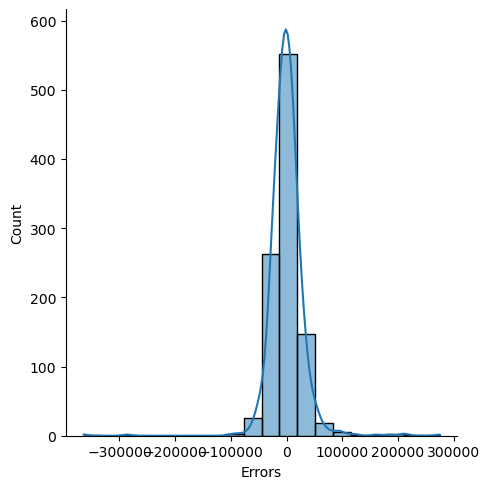

In [64]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = (10, 10))
sns.displot((y_train - y_train_lasso), bins = 20, kde=True)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors') 
plt.show()

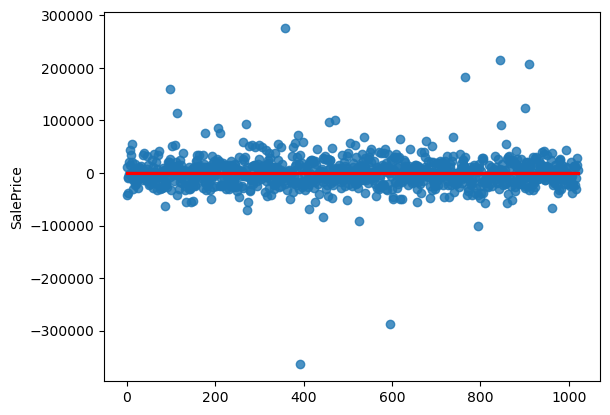

In [65]:
# Plot the scatterplot of the error terms
sns.regplot(x=list(range(0, y_train_lasso.shape[0])), y=(y_train - y_train_lasso), line_kws=dict(color="r"))
plt.show()

Observation
- Plotting histogram of errors obtained, a normal distribution is obtained this means there is a linear relationship between demand and set of predictor variables
- Scatter plot for errors shows there is homoscedasticity, i.e. error terms have constant variance

Conclusion
- Lasso is the better model because it provided feature selection and better accuracy than ridge.
- Also due to regularization it is more robust than Linear Regression.

## Subjective Questions coding

In [66]:
# initializing Ridge model for best lamda 0.001
ridgereg = Ridge(alpha = 20)
lassoreg = Lasso(alpha = 200)

ridgereg.fit(X_train, y_train)
lassoreg.fit(X_train, y_train)

# Predicting on train set
y_train_ridge = ridgereg.predict(X_train)
y_train_lasso = lassoreg.predict(X_train)

# Predicting on train set
y_test_ridge = ridgereg.predict(X_test)
y_test_lasso = lassoreg.predict(X_test)

# R2 squre
Train_r2= round(r2_score(y_train, y_train_ridge), 5) 
Test_r2 = round(r2_score(y_test, y_test_ridge), 5)
error['Score_new_Ridge'] = [Train_r2, Test_r2]

Train_r2= round(r2_score(y_train, y_train_lasso), 5) 
Test_r2 = round(r2_score(y_test, y_test_lasso), 5)
error['Score_new_Lasso'] = [Train_r2, Test_r2]

#printing
error

,Scores_Lin,Score_Ridge,Score_Lasso,Score_new_Ridge,Score_new_Lasso
Train R2,0.844,0.829,0.840,0.817,0.837
Test R2,0.840,0.826,0.834,0.814,0.831


Observation
- though now after doubling alpha r2 scores reduce, lasso still performs better in comparision to Ridge.

In [67]:
#Finding Coefficient of predictors 
coeff['Ridge_new_Coeff'] = ridgereg.coef_
coeff['Lasso_new_Coeff'] = lassoreg.coef_
coeff

,Lin_Coeff,Ridge_Coeff,Lasso_Coeff,Ridge_new_Coeff,Lasso_new_Coeff
LotFrontage,-31472.208,-873.868,-0.000,1839.563,-0.000
LotArea,62134.681,11356.719,0.000,7890.924,0.000
OverallQual,109286.310,61982.629,113541.997,45252.729,110008.615
OverallCond,33695.141,15628.526,22271.438,9757.935,12474.691
MasVnrArea,43915.484,32046.169,37958.865,25205.445,32300.102
BsmtFinSF1,12044.715,17885.621,0.000,13422.841,0.000
BsmtFinSF2,13354.312,6482.000,0.000,3823.489,0.000
BsmtUnfSF,3345.570,9890.308,0.000,9331.297,0.000
TotalBsmtSF,15626.821,21866.558,0.000,16889.075,0.000
1stFlrSF,112335.117,35437.123,0.000,25721.010,0.000


Observation
- the coefficients for both lasso and ridge have changed a lot after the alpha value got doubled

In [68]:
#top 10 important predictors by Ridge Regression
coeff[['Ridge_new_Coeff']].abs().sort_values(by='Ridge_new_Coeff', ascending=False).head(10)

,Ridge_new_Coeff
OverallQual,45252.729
2ndFlrSF,35820.419
GrLivArea,35533.884
TotRmsAbvGrd,29095.476
Fireplaces,27920.641
1stFlrSF,25721.010
MasVnrArea,25205.445
FullBath,25143.754
GarageCars,24177.533
GarageArea,19970.840


In [69]:
#top 10 important predictors by Lasso Regression
coeff[['Lasso_new_Coeff']].abs().sort_values(by='Lasso_new_Coeff', ascending=False).head(10)

,Lasso_new_Coeff
GrLivArea,218423.172
OverallQual,110008.615
GarageCars,35449.975
MasVnrArea,32300.102
BsmtFullBath,23895.765
Fireplaces,21679.515
OverallCond,12474.691
BsmtQual,11879.208
LandSlope,11719.853
KitchenQual,10107.788


In [70]:
# columns discarded by doubled alpha for Lasso
coeff[coeff['Lasso_new_Coeff']==0].index

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MSZoning', 'Street', 'Utilities', 'Condition1', 'Exterior1st',
       'Heating'],
      dtype='object')

In [71]:
# columns discarded by original alpha for lasso
coeff[coeff['Lasso_Coeff']==0].index

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'GarageArea', 'EnclosedPorch', '3SsnPorch', 'PoolArea',
       'MiscVal', 'MSZoning', 'Street', 'Utilities', 'Condition1',
       'BsmtFinType2'],
      dtype='object')

Observation
- top 10 rows did not change for both lasso and ridge but the coefficient varies
- more rows were discarded by doubling value of alpha